# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The problem I am trying to solve is one of correlating user data to venue data. What types of users frequent which kinds of restaurants? To narrow the scope and keep it relevant to the audience I will specify it to be of the category "Asian Restaurant". This type of analysis could aid in marketing efforts of a variety of locations in the area of focus. 
   
For this analysis I will focus on the area of Manhattan, New York. Specifically in the areas around the Empire State Building, where foot traffic and tourism would be most densely concentrated. 

My audience of stakeholders would be would be owners of Japanese cuisine restaurants in the Manhattan area, both local and chain restaurants that could benefit from this data to improve their targeted marketing.

## Data <a name="data"></a>

Data will be taken from the Foursquare database and primarily use the Venues and Users endpoints for the requests. Data will be matched based on the Check-in data to get details for the restaurant and the user in order to establish a connection. We will then establish counts for things like male/female patrons, home cities, friend counts, and so on. 

Based on our definition of the problem, the following data sources will be needed:
* Candidate areas based on a radius surrounding a central location (in our case the Empire State Building)
* Number of restaurants and their locations based on the Foursquare API calls
* User data matched from check-ins to those restaurants, matched by unique ids provided by Foursquare

Let's start by getting our necessary libraries ready.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import folium # plotting library
from pandas.io.json import json_normalize
from IPython.display import Image 
from IPython.core.display import HTML
import json
import matplotlib.pyplot as plt

In [2]:
CLIENT_ID = 'ID' # your Foursquare ID
CLIENT_SECRET = 'SECRET' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

In [3]:
address = '20 W 34th St, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7486538125 -73.9853043125


In [4]:
search_query = 'Japanese'
radius = 2000
print(search_query + ' .... OK!')

Japanese .... OK!


In [19]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d031652351e3d1ffb5294ef'},
 'response': {'venues': [{'id': '4ef0d81fbe7ba3ed7c2296d2',
    'name': 'Gyu-Kaku Japanese BBQ',
    'location': {'address': '321 W 44th St',
     'crossStreet': 'btwn 8th & 9th Ave',
     'lat': 40.75904160050783,
     'lng': -73.99004327793013,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.75904160050783,
       'lng': -73.99004327793013}],
     'distance': 1223,
     'postalCode': '10036',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['321 W 44th St (btwn 8th & 9th Ave)',
      'New York, NY 10036',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d111941735',
      'name': 'Japanese Restaurant',
      'pluralName': 'Japanese Restaurants',
      'shortName': 'Japanese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_',
       'suffix': '.png'},
      'primary': True}],
    'referra

In [7]:
venues = results['response']['venues']
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",NaN,NaN,NaN,NaN,NaN,NaN,False,4ef0d81fbe7ba3ed7c2296d2,321 W 44th St,...,"[321 W 44th St (btwn 8th & 9th Ave), New York,...","[{'label': 'display', 'lat': 40.75904160050783...",40.759042,-73.990043,NaN,10036,NY,Gyu-Kaku Japanese BBQ,v-1560483410,NaN
1,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",NaN,NaN,NaN,NaN,NaN,NaN,False,48208c8cf964a520894f1fe3,805 3rd Ave,...,"[805 3rd Ave (btwn E 49th & E 50th St), New Yo...","[{'label': 'display', 'lat': 40.75573050425004...",40.755731,-73.970897,NaN,10022,NY,Gyu-Kaku Japanese BBQ,v-1560483410,NaN
2,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",NaN,NaN,NaN,NaN,NaN,NaN,False,427ff980f964a520b7211fe3,34 Cooper Sq,...,"[34 Cooper Sq (btwn E 5th & E 6th St.), New Yo...","[{'label': 'display', 'lat': 40.72821272776984...",40.728213,-73.990913,NaN,10003,NY,Gyu-Kaku Japanese BBQ,v-1560483410,NaN
3,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E...",NaN,NaN,NaN,NaN,NaN,NaN,False,4be20ec01dd22d7ffa3c93bd,NaN,...,"[New York, NY 10036, United States]","[{'label': 'display', 'lat': 40.75544369348851...",40.755444,-73.980611,NaN,10036,NY,Japanese American Association Of New York,v-1560483410,NaN
4,"[{'id': '4bf58dd8d48988d199941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4d5b24ce6b2e3704ed237eee,227 W 27th St,...,"[227 W 27th St (btwn 7th & 8th), New York, NY ...","[{'label': 'display', 'lat': 40.75384633914933...",40.753846,-73.985761,NaN,10001,NY,FIT Japanese Class,v-1560483410,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# filter out non-restaurants
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered = dataframe_filtered[dataframe_filtered['categories'] != 'Event Space']
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != 'College Arts Building']
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != 'Furniture / Home Store']
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != 'Doctor\'s Office']
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != 'Church']
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != 'Cosmetics Shop']
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != 'Medical Center']
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != 'Health & Beauty Service']
dataframe_filtered = dataframe_filtered[dataframe_filtered.categories != 'Chiropractor']
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Gyu-Kaku Japanese BBQ,Japanese Restaurant,321 W 44th St,US,New York,United States,btwn 8th & 9th Ave,1223,"[321 W 44th St (btwn 8th & 9th Ave), New York,...","[{'label': 'display', 'lat': 40.75904160050783...",40.759042,-73.990043,NaN,10036,NY,4ef0d81fbe7ba3ed7c2296d2
1,Gyu-Kaku Japanese BBQ,Japanese Restaurant,805 3rd Ave,US,New York,United States,btwn E 49th & E 50th St,1447,"[805 3rd Ave (btwn E 49th & E 50th St), New Yo...","[{'label': 'display', 'lat': 40.75573050425004...",40.755731,-73.970897,NaN,10022,NY,48208c8cf964a520894f1fe3
2,Gyu-Kaku Japanese BBQ,Japanese Restaurant,34 Cooper Sq,US,New York,United States,btwn E 5th & E 6th St.,2324,"[34 Cooper Sq (btwn E 5th & E 6th St.), New Yo...","[{'label': 'display', 'lat': 40.72821272776984...",40.728213,-73.990913,NaN,10003,NY,427ff980f964a520b7211fe3
5,Atami Japanese Fusion,Japanese Restaurant,1167 2nd Ave,US,New York,United States,NaN,2396,"[1167 2nd Ave, New York, NY 10065, United States]","[{'label': 'display', 'lat': 40.76215844475948...",40.762158,-73.963174,NaN,10065,NY,5006eaf1e4b0d9eeb5cd67ef
6,Ichiban Japanese Restaurant,Sushi Restaurant,409 8th Ave,US,New York,United States,31st Street,834,"[409 8th Ave (31st Street), New York, NY 10001...","[{'label': 'display', 'lat': 40.75008204022070...",40.750082,-73.995017,NaN,10001,NY,4bde28866c1b9521ac51ad0f
8,Ruby's Japanese & Thai,Sushi Restaurant,259 1st Ave,US,New York,United States,at E 15th St.,1874,"[259 1st Ave (at E 15th St.), New York, NY 100...","[{'label': 'display', 'lat': 40.73199537280791...",40.731995,-73.982072,NaN,10003,NY,4a8cb3fff964a520ed0e20e3
9,Mizu Japanese & Thai Cuisine,Japanese Restaurant,29 E 20th St,US,New York,United States,at Broadway,1125,"[29 E 20th St (at Broadway), New York, NY 1000...","[{'label': 'display', 'lat': 40.73895775922568...",40.738958,-73.989083,NaN,10003,NY,45127b37f964a520a0391fe3
10,Edo Japanese Restaurant,Sushi Restaurant,9 E 17th St,US,New York,United States,btw 5th Ave & Broadway,1340,"[9 E 17th St (btw 5th Ave & Broadway), New Yor...","[{'label': 'display', 'lat': 40.73754004956548...",40.737540,-73.991430,NaN,10003,NY,4a78718ff964a520a4e51fe3
12,Ai's Sushi Japanese Restaurant,Sushi Restaurant,374 W 46th St,US,New York,United States,9th Ave,1427,"[374 W 46th St (9th Ave), New York, NY 10036, ...","[{'label': 'display', 'lat': 40.76086989104696...",40.760870,-73.990469,NaN,10036,NY,4fd91c44e4b0d9021d3ee7ca
13,Asahi Japanese Cuisine,Japanese Restaurant,311 W 48th St,US,New York,United States,NaN,1402,"[311 W 48th St, New York, NY 10036, United Sta...","[{'label': 'display', 'lat': 40.76116, 'lng': ...",40.761160,-73.987306,NaN,10036,NY,4e4e4aa6bd4101d0d7a6fc27


In [9]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Empire State Building

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Empire State Building',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Japanese restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Methodology <a name="methodology"></a>

In this project we will direct efforts towards finding the ideal customer profile for the typical patron of a Japanese restarant in the most tourist-y areas of Manhattan. The analysis is limited to 2 km around the EMpire State Building, one of the most iconic tourist destinations in New York City. 

In the previous steps, we compiled a list of Japanese cuisine restaurants in the area described, and set up an example profile of a patron of one of the restaurants closest to the tower. We identified the area using and the centerpoint using the Geocoders library and location API. Using the FOursquare API, we were able to tie in this information to find Japanese restaurants within the suiatble radius. 

The next step of the analysis will be to run a user profiling on all restaurants and users who liked the restaurant. The ideology here being that is they took the time to "like" the restaurant, this would indicate an exceptionally good experience of the user. 

The third step would be to run clustering of the user profiles to determine what factors lead to liking the restaurants including gender, friend count, and home city. This woul be presented to the stakeholders in order to inform them of their target audience for marketing activities. 

## Analysis <a name="analysis"></a>

To start, we will use the ids of the restaurants we found to connect these to our check-ins.

In [10]:
dataframe_filtered.name

0                  Gyu-Kaku Japanese BBQ
1                  Gyu-Kaku Japanese BBQ
2                  Gyu-Kaku Japanese BBQ
5                  Atami Japanese Fusion
6            Ichiban Japanese Restaurant
8                 Ruby's Japanese & Thai
9           Mizu Japanese & Thai Cuisine
10               Edo Japanese Restaurant
12        Ai's Sushi Japanese Restaurant
13                Asahi Japanese Cuisine
16                          Japanese Pub
17              Yama Japanese Restaurant
18                Ajisai Japanese Fusion
19               Hiroshi Japanese Fusion
20            Oishi Bay Japanese Cuisine
23            Sariku Japanese Restaurant
24                      Japanese Cuisine
26                           Gu Japanese
28         Ten Sushi Japanese Restaurant
29    East Chinese & Japanese Restaurant
Name: name, dtype: object

In [11]:
dataframe_filtered.id

0     4ef0d81fbe7ba3ed7c2296d2
1     48208c8cf964a520894f1fe3
2     427ff980f964a520b7211fe3
5     5006eaf1e4b0d9eeb5cd67ef
6     4bde28866c1b9521ac51ad0f
8     4a8cb3fff964a520ed0e20e3
9     45127b37f964a520a0391fe3
10    4a78718ff964a520a4e51fe3
12    4fd91c44e4b0d9021d3ee7ca
13    4e4e4aa6bd4101d0d7a6fc27
16    5202fac2498ebd638045bf59
17    49c2ede7f964a52044561fe3
18    4b9fbebdf964a520c83a37e3
19    470363eaf964a5203e4b1fe3
20    52e55531498e7a42cd0c25b1
23    4e4c4f09bd413c4cc66864b3
24    4ea1ad4e6c25b62f3d0e6cef
26    5a90b252e7a2371b972f4139
28    4e4e4ad5bd4101d0d7a7002d
29    4c2a71ebbbc7e21e1d423582
Name: id, dtype: object

Let's get an example of the users who liked Gyu-Kaku Japanese BBQ on 44th St.

In [12]:
venue_id = '4ef0d81fbe7ba3ed7c2296d2'
url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d031652351e3d20004610f0'},
 'response': {'likes': {'count': 629,
   'summary': '629 Likes',
   'items': [{'id': '20127649',
     'firstName': 'Spyros',
     'lastName': 'D',
     'gender': 'male',
     'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
      'suffix': '/20127649_o6lc3s-r_wxgGnrb0PDtp0n4Zp0Lts7F7Kc9Ih8Eq8U3ait_DSpNkoDeodvkahXJyao7M6YH9'}},
    {'id': '394064620',
     'firstName': 'Beez',
     'lastName': 'S',
     'gender': 'none',
     'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
      'suffix': '/blank_boy.png',
      'default': True}}]}}}

Here, we got two people who loked the place, both male. One may consider this a restaurant who might benefit from advertising to males, although let's see if we can get more details on these two.

In [13]:
user_id = '34929'
url = 'https://api.foursquare.com/v2/users/{}?client_id={}&client_secret={}&v={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d031653018cbb002c039b0a'},
 'notifications': [],
 'response': {'user': {'id': '34929',
   'firstName': 'Amol',
   'lastName': 'S',
   'gender': 'male',
   'canonicalUrl': 'https://foursquare.com/amol',
   'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
    'suffix': '/4a8ff7dee1a99.jpg'},
   'friends': {'count': 151,
    'groups': [{'type': 'others',
      'name': 'Other friends',
      'count': 151,
      'items': [{'id': '293091',
        'firstName': 'Rachel',
        'lastName': 'W',
        'gender': 'female',
        'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
         'suffix': '/OPVVFY51Z0VQZST3.jpg'},
        'tips': {'count': 0},
        'lists': {'groups': [{'type': 'created', 'count': 2, 'items': []}]},
        'homeCity': 'New York, NY',
        'bio': '',
        'contact': {}},
       {'id': '19509500',
        'firstName': 'Milos',
        'lastName': 'P',
        'gender': 'male',
        'photo': {'prefix': '

Above we can see one of the likes was from Amol Sarva, a male with quite a few friends who hails from Long Island, NY. These details can be useful in determining a profile of people who are attracted to Japanese cuisine, or are frequent patrons of Gyu-Kaku in particular.

Moving on, let's expand this analysis to the other restaurants. We can grap a list of all user_ids that liked every restaurant in our list to start with. Below we can also see the structure of the results we are getting.

In [14]:
venue_list = dataframe_filtered.id
results = []
for venue in venue_list:
    url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(venue, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    results.append(result)
results[1]

{'meta': {'code': 200, 'requestId': '5d03165389b06a002cdf65f2'},
 'response': {'likes': {'count': 472,
   'summary': '472 Likes',
   'items': [{'id': '346688008',
     'firstName': 'Lola',
     'lastName': 'C',
     'gender': 'female',
     'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
      'suffix': '/blank_girl.png',
      'default': True}},
    {'id': '378576637',
     'firstName': 'Sam',
     'lastName': 'S',
     'gender': 'male',
     'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
      'suffix': '/378576637-NGC2K4FMBMKDAYGW.jpg'}},
    {'id': '134732237',
     'firstName': 'Takashi',
     'lastName': 'A',
     'gender': 'none',
     'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
      'suffix': '/134732237-WNE3CBFOQGAEXTV0.jpg'}}]}}}

In [15]:
user_ids = []
for result in results:
    user_ids.append(result['response']['likes']['count'])
user_ids

[629, 472, 773, 29, 5, 1, 78, 139, 4, 0, 0, 204, 65, 34, 18, 1, 0, 2, 0, 0]

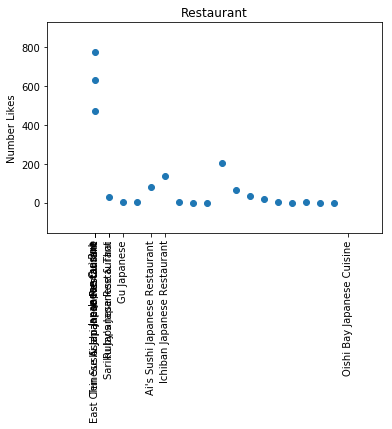

In [16]:
y = dataframe_filtered.name.tolist()
plt.scatter(y, user_ids)
plt.xticks(user_ids, y, rotation='vertical')
plt.ylabel('Number Likes')
plt.title('Restaurant')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.show()

Based on the counts of likes that each user gave, we can surmise a couple of things: first that the counts seem to trend either very high or very low with no in-between, and second that the numerical mode seems to be 0, whereas the mean is far above that. While it seems at a glance that this is useless, it can justify incentive to target users with very high numbers of likes for advertisements when in the area. This would be more useful than targeting the 0 likes population since they are far greater in number and more spread out in terms of preferences.

In [17]:
genders = []
for result in results:
    stri = str(result['response']['likes'])
    ch = 'x'
    while len(stri) > 0:
        try:
            ch = stri.split("\'gender\': \'",1)[1][0]
        except:
            ch = 'n'
        if "gender" in stri:
            stri = stri.split("\'gender\': \'",1)[1]
        else:
            stri = ""
        if ch == 'm':
            genders.append('Male')
        elif ch == 'f':
            genders.append('Female')
        else:
            genders.append('None')
genders

['Male',
 'None',
 'None',
 'Female',
 'Male',
 'None',
 'None',
 'Female',
 'Male',
 'Male',
 'None',
 'Female',
 'Female',
 'None',
 'None',
 'Female',
 'Male',
 'None',
 'None',
 'None',
 'Male',
 'Male',
 'Male',
 'None',
 'Male',
 'Female',
 'Female',
 'None',
 'Male',
 'Female',
 'Male',
 'None',
 'None',
 'None',
 'Female',
 'Male',
 'Male',
 'None',
 'Male',
 'Male',
 'None',
 'None',
 'Female',
 'Female',
 'Female',
 'None',
 'Female',
 'Female',
 'Female',
 'None',
 'Female',
 'None',
 'None',
 'Male',
 'Female',
 'None',
 'None',
 'None']

Looking a the results we get, we have 58 total entries: 17 female, 14 male, and 27 which decline to identify their gender. Presumably, the split between those who decline to identify are evenly split as well. This indicates to us that we should probably avoid advertising that is heavily catered to one gender, as we are receiving patronage from both in relatively similar quantities.

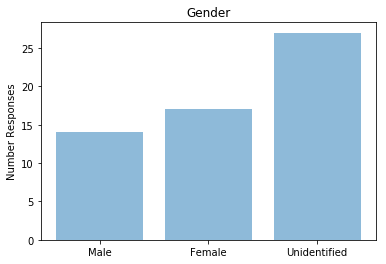

In [18]:
g = ['Male', 'Female', 'Unidentified']
y_pos = np.arange(len(g))
p = [14, 17, 27]
plt.bar(y_pos, p, align='center', alpha=0.5)
plt.xticks(y_pos, g)
plt.ylabel('Number Responses')
plt.title('Gender')

plt.show()

## Results and Discussion <a name="results"></a>

Users predominantly fall into two categories when it comes to number of friends they have. Either there are a lot of friends or very few if any.

This tells us there is perhaps a value in targeting advertising to users who have a lot of friends on the app. This would narrow down the number of recipients as well as ensure reaching a wider audience through the recommendation of those individuals.

Looking at gender next, we found there to be no clear advantage to either gender as there was 17 female, 14 male, and 27 not identified. It seems that in this case there might be a slight preference towards females, but we cannot tell with much of the information obscured by the fact that many of the users choose not to identify their gender. 

We should avoid targeting one gender or another in marketing in order to ensure that we reach the current audience in keeping with the current statistics.

## Conclusion <a name="conclusion3345"></a>

Overall, this analysis has shown that it is best to target high-usage and high-engagement users of the platform, and then cast as wide a net as possible after that. With the analysis being centered around a more traditional cuisine, there seem to be no obvious bias in gender to be had that would greatly affect marketing strategy.

In the future, more detailed user profiles or even surveys could be used to mine more data and draw better conclusions. Given the user information of the managers of these venues, I would have access to more and cleaner statistics, which would also improve these analyses greatly.

Overall, these analyses can help restaurants in the area either discover new information, or more likely, confirm their preconceived notions based on their actual experience. Providing data backing to their experience will assist them in making decisions with confidence. 

To conclude, the results we achieved are not conclusive by any means, but they do offer a good insight that can generalize the target audience for these Japanese restaurants and provide them with insight into the marketing strategy they should pursue in order to retain customers and attract new ones to their establishments. 